# 사전 학습된 모델 사용해보기: FastAI

## 사전 학습된 모델

- 대규모 데이터셋에서 미리 학습된 상태로 제공되는 모델. 기본적 패턴, 특징을 학습했기 때문에, 특정 작업에 대한 파인 튜닝을 통해 쉽게 높은 성능 얻을 수 있음.
- ex. 이미지 분류 작업에서 ImageNet 데이터셋 사용.

## FastAI 설치 및 설정

1. FastAI 설치 :  

    ```shell
    pip install fastai
    ```

2. 라이브러리 임포트

In [1]:
from fastai.vision.all import *

## 사전 학습된 ResNet 모델을 사용한 이미지 분류

- 고양이와 강아지 이미지 분류하는 작업 수행이 목표.

1. 데이터셋 로드 및 준비

FastAI에서 제공하는 PETS 데이터셋 사용.

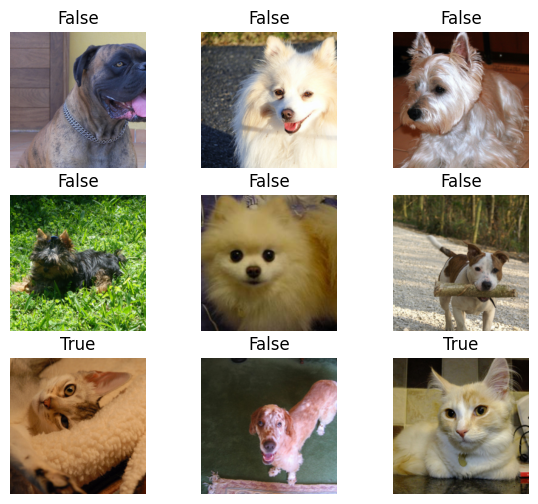

In [ ]:
# 데이터셋 로드
path = untar_data(URLs.PETS)  # PETS 데이터셋 다운로드 및 압축 해제
path_imgs = path/'images'

# 이미지 파일 라벨링 함수 정의
def is_cat(x): return x[0].isupper()

# 데이터블록 정의(검증 데이터셋 비율 20퍼센트)
dls = ImageDataLoaders.from_name_func(  # 파일 이름에서 라벨 추출, 이미지 데이터로더 생성
    path_imgs, get_image_files(path_imgs), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# 이미지 샘플을 확인
dls.show_batch(max_n=9, figsize=(7, 6))

2. 사전 학습된 ResNet 모델 로드 및 학습

- 이미지 분류 작업 수행.
- ResNet은 이미지 분류 작업에서 널리 사용되는 CNN모델.

c:\Users\By the book\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\By the book/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 76.5MB/s]


c:\Users\By the book\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, m

epoch,train_loss,valid_loss,error_rate,time
0,0.128928,0.029260,0.010149,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.061416,0.019603,0.007442,01:10
1,0.035423,0.026336,0.006766,01:06
2,0.014733,0.013955,0.004060,01:09


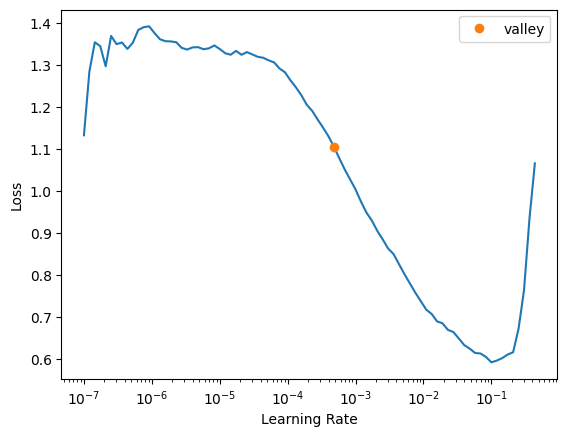

In [3]:
# ResNet34 사전 학습된 모델을 사용해 학습기 생성
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# 학습률 찾기 (최적의 학습률을 자동으로 찾아줌)
learn.lr_find()

# 모델 학습 (사전 학습된 모델에 대해 파인 튜닝)
learn.fine_tune(3)

3. 모델 평가

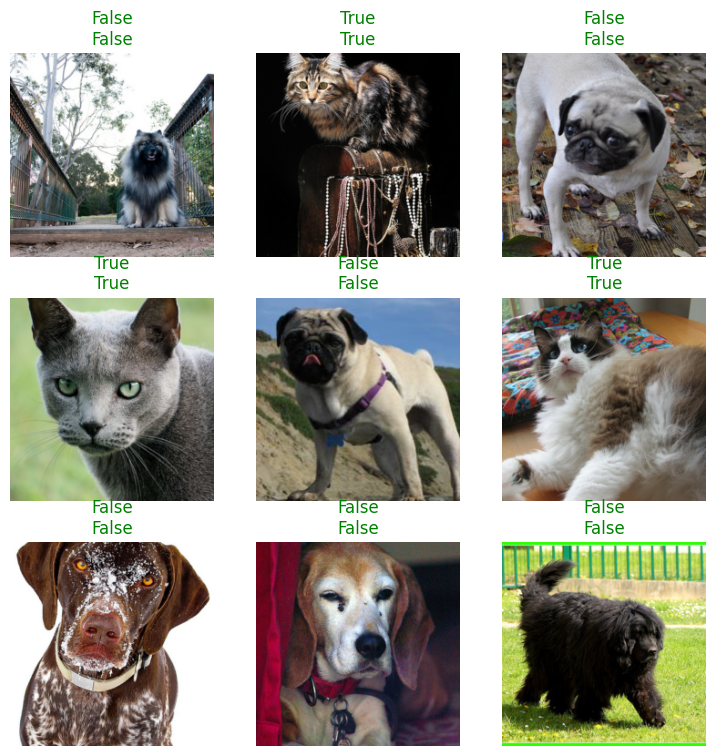

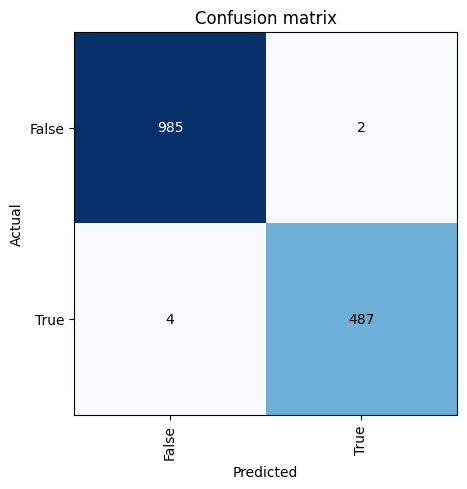

In [4]:
# 모델 평가
learn.show_results()

# 혼동 행렬 (Confusion Matrix) 출력
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

4. 새로운 이미지에 대한 예측

Prediction: True, Probability: 1.0000


<Axes: >

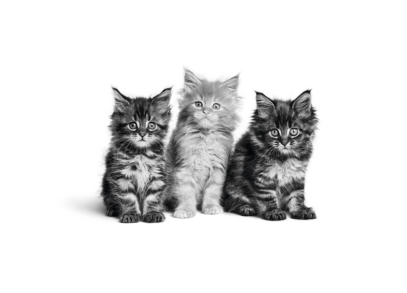

In [5]:
# 새로운 이미지에 대한 예측
img = PILImage.create('kittens.png') # 새 이미지 로드
pred, _, probs = learn.predict(img) # 학습된 모델 활용해 예측 수행

# 결과 출력
print(f"Prediction: {pred}, Probability: {probs.max():.4f}")
img.show()
